In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
'''
https://www.kaggle.com/code/dvrob92/data-exploration-housing-dataset
Process steg:
- Importera in  dataset
- Analysera dataset (Se över datakvalitet). 
    - Se över sakade värden.
    - Se över kostiga Max och Min värden
- Sammanfatta statistik

'''

'\nProcess steg:\n- Importera in  dataset\n- Analysera dataset (Se över datakvalitet). \n    - Se över sakade värden.\n    - Se över kostiga Max och Min värden\n- Sammanfatta statistik\n    - Huset värde\n    - Inkomst\n    - Population och rum\n'

In [57]:
df  = pd.read_csv("housing.csv")

In [58]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


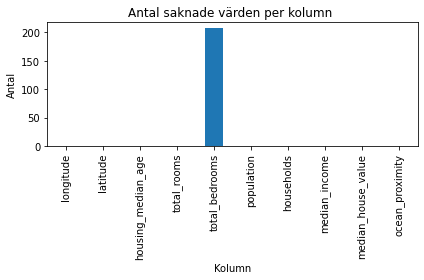

In [60]:
# Se över datakvalitet

# Kolla om det finns några saknade värden alls
#print(df.isnull().values.any())
## - Det finns saknade värde i data settet : True

# Kolla antal saknade värden per kolumn
print(df.isnull().sum())
## Column "total_bedrooms" har 207 toma rader

# Visa rader som innehåller minst ett saknat värde
#print(df[df.isnull().any(axis=1)])
## - Det finns saknade värde i data settet : True

## visualisera med Bar
sum = df.isnull().sum()
titel = "Antal saknade värden per kolumn "
df.isnull().sum().plot(kind="bar")
plt.title(titel)
plt.ylabel("Antal")
plt.xlabel("Kolumn")
plt.tight_layout()
plt.show()


In [67]:
#Se över datakvalitet
#Undersök varför data fattas i Col "total_bedrooms"

Null_bedrooms = df[df["total_bedrooms"].isna()]
Null_bedrooms.head(10)
 
## - Kan just nu inte se några samband varför det inte finns data i dessa Col
## - Undersöker vidare senare om det behövs.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


In [50]:
#Se över datakvalitet
# Ta fram en övre gänsvärde för respektive kolumn
#print(df.agg(["min", "max"]))

## tar inte med "longitude" &  "latitude" och formatera till helta
cols_to_skip = ["longitude", "latitude"]

result = pd.DataFrame({
    "min": df.drop(columns=cols_to_skip).min(numeric_only=True),
    "max": df.drop(columns=cols_to_skip).max(numeric_only=True)
}).round(0).astype(int)

print(result)

'''
Kostaterade att max Värde på kolumn "total_rooms" och "total_bedrooms"
är väldigt höga.
Om jag förstår rätt från  föreläsning så är det antal inom området.
'''



                      min     max
housing_median_age      1      52
total_rooms             2   39320
total_bedrooms          1    6445
population              3   35682
households              1    6082
median_income           0      15
median_house_value  14999  500001


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


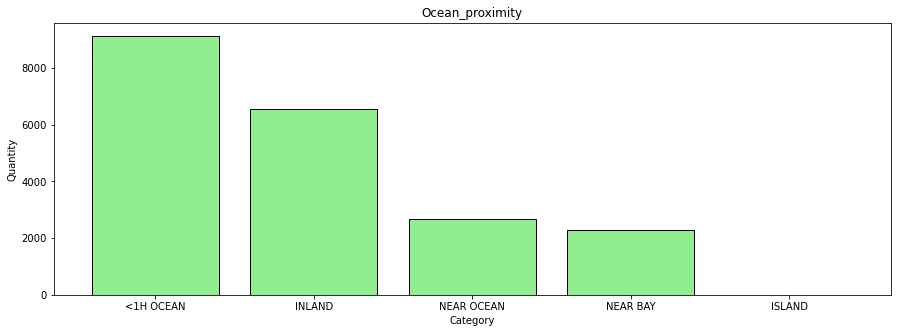

In [77]:
# Sammanfatta statistik över huset förhållande till havet
# 
grp_ocean_proximity = df["ocean_proximity"].unique()
grp_ocean_proximity_value = df["ocean_proximity"].value_counts()
#print(grp_ocean_proximity)
print(grp_ocean_proximity_value)

plt.figure(figsize=(15,5))
plt.bar(grp_ocean_proximity_value.index,grp_ocean_proximity_value.values,color="lightgreen",edgecolor="black")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Ocean_proximity")

plt.show()


In [100]:
# Plotting population v ocean proximity

plt.figure(figsize=(12,8))
plt.plot(column="population",by="ocean_proximity", '.g')
plt.title("Total Population vs Proximity to the Ocean")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Ocean Proximity")
plt.ylabel("Total Population")
plt.show()


SyntaxError: positional argument follows keyword argument (Temp/ipykernel_15228/3049628565.py, line 4)